In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amosjeromeolal","key":"18a4b14586e7197a5f70f6b5394d24c0"}'}

In [10]:
 ! mkdir ~/.kaggle

In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
 ! chmod 600 ~/.kaggle/kaggle.json


In [13]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:44<00:00, 24.1MB/s]
100% 2.29G/2.29G [01:44<00:00, 23.6MB/s]


In [14]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical, plot_model


In [3]:
train_folder = "/content/chest_xray/train"
test_folder = "/content/chest_xray/test"
validate_folder = "/content/chest_xray/val"

In [4]:
normal_folder_test = "/content/chest_xray/test/NORMAL/"
pneumonia_folder_test = "/content/chest_xray/test/PNEUMONIA/"
normal_folder_train = "/content/chest_xray/train/NORMAL/"
pneumonia_folder_train = "/content/chest_xray/train/PNEUMONIA/"
normal_folder_validate = "/content/chest_xray/val/NORMAL/"
pneumonia_folder_validate = "/content/chest_xray/val/PNEUMONIA/"


In [5]:
name_files_normal_train=os.listdir(normal_folder_train)
name_files_pneumonia_train=os.listdir(pneumonia_folder_train)
name_files_normal_test=os.listdir(normal_folder_test)
name_files_pneumonia_test=os.listdir(pneumonia_folder_test)
name_files_normal_validate=os.listdir(normal_folder_validate)
name_files_pneumonia_validate=os.listdir(pneumonia_folder_validate)

In [8]:
name_files_normal_validate

['NORMAL2-IM-1442-0001.jpeg',
 'NORMAL2-IM-1427-0001.jpeg',
 'NORMAL2-IM-1436-0001.jpeg',
 'NORMAL2-IM-1437-0001.jpeg',
 'NORMAL2-IM-1440-0001.jpeg',
 'NORMAL2-IM-1430-0001.jpeg',
 'NORMAL2-IM-1438-0001.jpeg',
 'NORMAL2-IM-1431-0001.jpeg']

In [6]:
df_train_normal=pd.DataFrame(name_files_normal_train,columns=["images"])
df_train_normal["labels"]=0
df_train_normal["images"]=normal_folder_train+df_train_normal["images"]
#ADDING THE COMPLETE PATH OF IMAGES

df_train_pneumonia=pd.DataFrame(name_files_pneumonia_train,columns=["images"])
df_train_pneumonia["labels"]=1
df_train_pneumonia["images"]=pneumonia_folder_train+df_train_pneumonia["images"]

df_test_normal=pd.DataFrame(name_files_normal_test,columns=["images"])
df_test_normal["labels"]=0
df_test_normal["images"]=normal_folder_test+df_test_normal["images"]

df_test_pneumonia=pd.DataFrame(name_files_pneumonia_test,columns=["images"])
df_test_pneumonia["labels"]=1
df_test_pneumonia["images"]=pneumonia_folder_test+df_test_pneumonia["images"]

df_validate_normal=pd.DataFrame(name_files_normal_validate,columns=["images"])
df_validate_normal["labels"]=0
df_validate_normal["images"]=normal_folder_validate+df_validate_normal["images"]

df_validate_pneumonia=pd.DataFrame(name_files_pneumonia_validate,columns=["images"])
df_validate_pneumonia["labels"]=1
df_validate_pneumonia["images"]=pneumonia_folder_validate+df_validate_pneumonia["images"]

In [7]:
DF1=pd.concat([df_train_pneumonia,df_train_normal,df_test_pneumonia,df_test_normal,df_validate_pneumonia,df_validate_normal], ignore_index=True)
DF1.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels
0,/content/chest_xray/train/PNEUMONIA/person727_...,1
1,/content/chest_xray/train/NORMAL/NORMAL2-IM-13...,0
2,/content/chest_xray/train/PNEUMONIA/person552_...,1
3,/content/chest_xray/train/PNEUMONIA/person26_b...,1
4,/content/chest_xray/train/PNEUMONIA/person517_...,1
...,...,...
5851,/content/chest_xray/train/PNEUMONIA/person1770...,1
5852,/content/chest_xray/train/NORMAL/NORMAL2-IM-09...,0
5853,/content/chest_xray/test/PNEUMONIA/person126_b...,1
5854,/content/chest_xray/test/PNEUMONIA/person120_b...,1


In [8]:
DF1["mat_images"]=DF1['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))

In [9]:
DF1.labels.unique()

array([1, 0])

In [10]:
DF1.mat_images[0][0]

array([  9,   9, 255, 255,   9,   8,   9,   6, 253, 242,   3,   7,   8,
         8,   6,   7,   6,   6,   6,   6,   6,   7,   7,   7,   7,   6,
         6,   7,   7,   8,   7,   8,   7,   7,   7,   7,   6,   6,   6,
         6,   6,   5,   5,   5,   6,   5,   5,   3,   3,   2,   2,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 142,  89, 175,
        37,  32,  48,  52,  48,  54,  60,  61,  66,  66,  65,  62,  83,
       112, 116, 126, 128, 129, 150, 151, 148, 155, 170, 170, 164, 197,
       197, 198, 200, 187, 191, 186, 193, 204, 196, 217, 212, 203, 212,
       211, 197, 172, 184, 167, 188, 186, 185, 193, 201, 194, 204, 196,
       192, 201, 211, 185, 196, 193, 196, 197, 198, 209, 207, 211, 187,
       152, 147, 138, 139, 140, 135, 128, 158, 112,  90,  81,  78, 142,
       140,  37,  40,  36,  47,  53,  79,  89,  71,  44,  12,  17,  20,
       102, 135, 138,  87,  71,  83, 121, 144, 153, 100,  49,  34,  35,
        35,  33,  36,  50,  56,  67,  65,  72,  65,  72,  76,  7

In [21]:
DF1.head()

,images,labels,mat_images
0,/content/chest_xray/train/PNEUMONIA/person1454...,1,"[[9, 9, 255, 255, 9, 8, 9, 6, 253, 242, 3, 7, ..."
1,/content/chest_xray/train/PNEUMONIA/person579_...,1,"[[4, 6, 11, 17, 22, 24, 33, 40, 43, 44, 56, 68..."
2,/content/chest_xray/train/PNEUMONIA/person23_b...,1,"[[39, 41, 40, 42, 46, 48, 51, 51, 55, 58, 62, ..."
3,/content/chest_xray/train/PNEUMONIA/person1424...,1,"[[0, 0, 0, 0, 0, 4, 8, 13, 14, 18, 26, 27, 32,..."
4,/content/chest_xray/train/PNEUMONIA/person1418...,1,"[[16, 29, 46, 37, 58, 67, 61, 76, 93, 78, 79, ..."


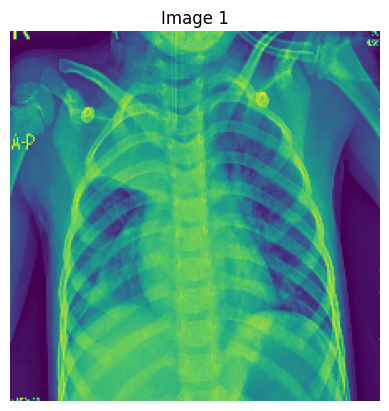

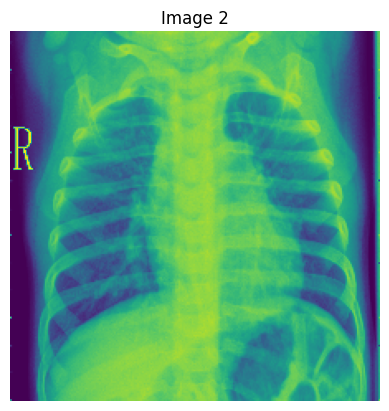

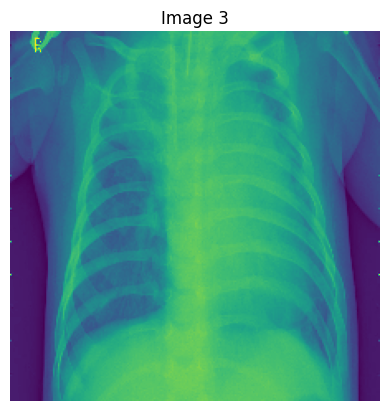

In [22]:
#Displaying images of Pneumonia
DF1.sample(frac=1).reset_index(drop=True)
images_pneumonia= DF1[DF1.labels==1]
for i in range(3):
    image_data = images_pneumonia['mat_images'][i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')

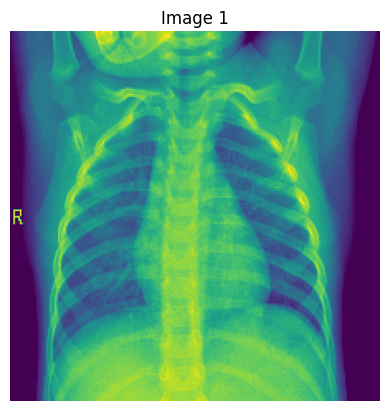

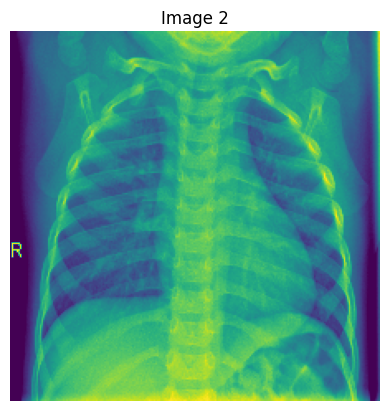

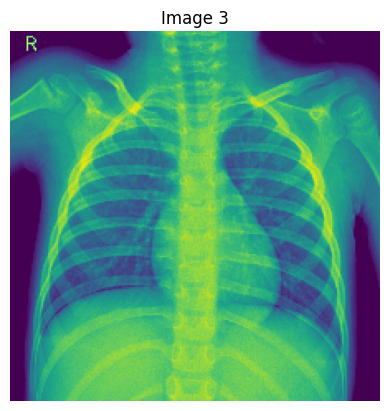

In [23]:
#Displaying normal images
images_normal= DF1[DF1.labels==0].mat_images
images_normal=images_normal.reset_index(drop=True)

for i in range(3):
    image_data = images_normal[i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')


In [24]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
100% 663M/663M [00:30<00:00, 22.2MB/s]
100% 663M/663M [00:30<00:00, 23.1MB/s]


In [25]:
!unzip tuberculosis-tb-chest-xray-dataset.zip

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1005.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1006.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1007.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1008.png  
  inflating: TB_Chest_Radiography_Database/Normal/Normal-1009.png  
  infla

#Importing Tuberculosis dataset

In [11]:
DATA2_TRAIN_NORMAL="/content/TB_Chest_Radiography_Database/Normal/"
DATA2_TRAIN_Tuberculosis="/content/TB_Chest_Radiography_Database/Tuberculosis/"


In [ ]:
Normal_img=os.listdir(DATA2_TRAIN_NORMAL)
Tuberculosis_img=os.listdir(DATA2_TRAIN_Tuberculosis)
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=0
dnorm["images"]=DATA2_TRAIN_NORMAL+dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=2
dtuber["images"]=DATA2_TRAIN_Tuberculosis+dtuber["images"]

## Concating normal and tuberculosis dataframes
DF2=pd.concat([dnorm,dtuber],ignore_index=True)
# Adding img arrays to the dataset
DF2["mat_images"]=DF2['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF2.sample(frac=1, random_state=42).reset_index(drop=True)

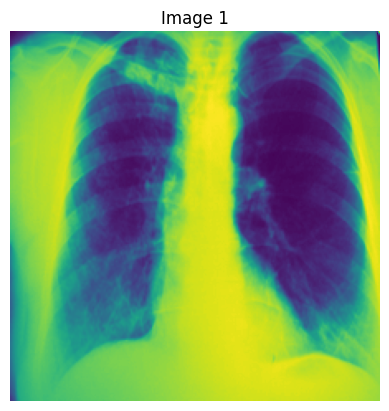

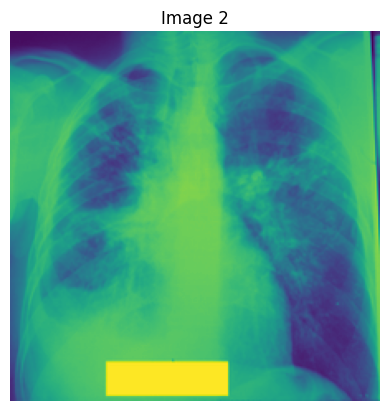

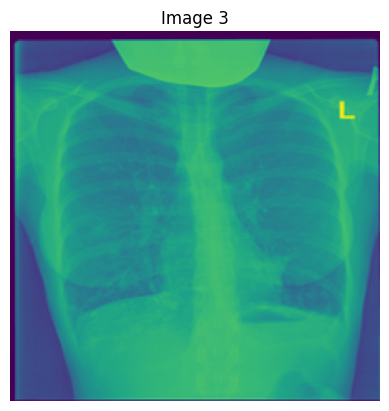

In [28]:
#Displaying TB images
DF2.sample(frac=1).reset_index(drop=True)
images_tb= DF2[DF2.labels==2].mat_images
images_tb=images_tb.reset_index(drop=True)
for i in range(3):
    image_data = images_tb[i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')  # Remove axis labels

In [17]:
#Final dataframe
df=pd.concat([DF1,DF2],ignore_index=True)
df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,images,labels,mat_images
0,/content/chest_xray/train/PNEUMONIA/person1454...,1,"[[9, 9, 255, 255, 9, 8, 9, 6, 253, 242, 3, 7, ..."
1,/content/chest_xray/train/PNEUMONIA/person579_...,1,"[[4, 6, 11, 17, 22, 24, 33, 40, 43, 44, 56, 68..."
2,/content/chest_xray/train/PNEUMONIA/person23_b...,1,"[[39, 41, 40, 42, 46, 48, 51, 51, 55, 58, 62, ..."
3,/content/chest_xray/train/PNEUMONIA/person1424...,1,"[[0, 0, 0, 0, 0, 4, 8, 13, 14, 18, 26, 27, 32,..."
4,/content/chest_xray/train/PNEUMONIA/person1418...,1,"[[16, 29, 46, 37, 58, 67, 61, 76, 93, 78, 79, ..."
...,...,...,...
10051,/content/TB_Chest_Radiography_Database/Tubercu...,2,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
10052,/content/TB_Chest_Radiography_Database/Tubercu...,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10053,/content/TB_Chest_Radiography_Database/Tubercu...,2,"[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,..."
10054,/content/TB_Chest_Radiography_Database/Tubercu...,2,"[[51, 50, 48, 45, 42, 39, 37, 35, 34, 32, 30, ..."


In [18]:
df.labels.value_counts()

labels
0    5083
1    4273
2     700
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='labels'>

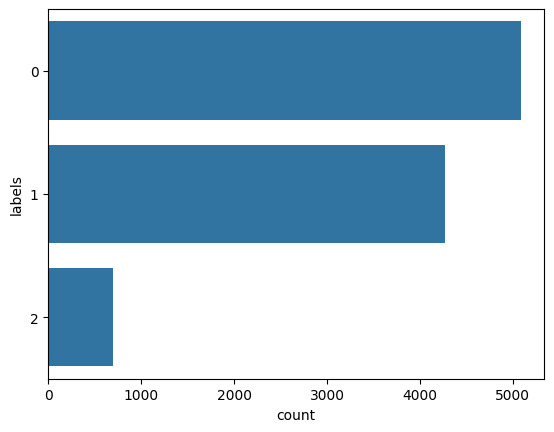

In [19]:
sns.countplot(y='labels',data=df)

In [20]:
X=df["mat_images"]
y=df["labels"]

In [21]:
X=X/255

In [22]:
X.shape

(10056,)

In [35]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10051    2
10052    2
10053    2
10054    2
10055    2
Name: labels, Length: 10056, dtype: int64

In [23]:
Y=to_categorical(y,3)
# The class labels [0, 1, 2] will be transformed into the following one-hot encoded format:
# 0 becomes [1, 0, 0]
# 1 becomes [0, 1, 0]
# 2 becomes [0, 0, 1]
Y

NameError: name 'y' is not defined

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8044,)
(8044, 3)
(2012,)
(2012, 3)


In [38]:
X[0]

array([[0.03529412, 0.03529412, 1.        , ..., 0.95294118, 0.01176471,
        0.01568627],
       [0.02745098, 0.03529412, 1.        , ..., 0.98039216, 0.01176471,
        0.00784314],
       [0.02745098, 0.03137255, 1.        , ..., 0.00784314, 0.96470588,
        0.01568627],
       ...,
       [0.05490196, 0.05490196, 0.05490196, ..., 0.03137255, 0.03137255,
        0.03137255],
       [0.05490196, 0.06666667, 0.03529412, ..., 0.03137255, 0.03137255,
        0.03137255],
       [0.05490196, 0.71372549, 0.03137255, ..., 0.03137255, 0.03137255,
        0.03137255]])

In [1]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object) # creating an np array X_train that contains all images in type np array
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

NameError: name 'np' is not defined

In [3]:
# Allocate a large amount of memory to trigger the offer for more RAM
a = [0] * (10**8)

In [ ]:
X_train[0]

In [ ]:
X[0]

In [ ]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
## CNN Model
layers = [
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
]

# Create a Sequential model and pass the layers list
model_1 = Sequential(layers)

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=64,verbose= True)

In [ ]:
## Save the model diagram to a file (e.g., 'model_diagram.png')
plot_model(model_1, to_file='model_diagram.png', show_shapes=True)
plot_model(model_1, show_shapes=True)

In [ ]:
model_1.summary()

In [ ]:
plt.plot(model_1.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

In [ ]:
y_test

In [ ]:
y_pred = model_1.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred = model_1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
y_test.shape

In [ ]:
np.unique(y_true)

In [ ]:
pd.Series(y_true).value_counts()

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True , fmt="d", cmap="Blues", xticklabels=['Normal', 'Pnemounia', 'Tuberclosis'], yticklabels=['Normal', 'Pnemounia', 'Tuberclosis'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='weighted')
f1